In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
clinic = pd.read_csv("clinic.csv")
clinic

,Unnamed: 0,StudySubjectID,r_time,r_gender,r_weight,r_ivtrom,r_treall,linr_abl,trombo_abl,lkreat_abl,...,SAE_PS_1stonly,subarch,ph2,ph1,hi1,hi2,ph2_c,ph1_c,hi1_c,hi2_c
0,0,AMC001,22:13,Male,66.0,Yes,1 - Intra-arterial treatment,1.0,236.0,71.0,...,No,NaN,No,No,NaN,NaN,No,No,No,No
1,1,AMC002,04:59,Male,98.0,No,0 - No intra-arterial treatment,2.4,236.0,89.0,...,No,NaN,No,No,NaN,NaN,No,No,No,No
2,2,AMC003,05:51,Male,90.0,No,1 - Intra-arterial treatment,1.0,344.0,93.0,...,Yes,NaN,Yes,No,No,No,Yes,No,No,No
3,3,AMC004,01:53,Male,90.0,Yes,1 - Intra-arterial treatment,NaN,NaN,NaN,...,No,NaN,Yes,No,No,No,Yes,No,No,No
4,4,AMC005,15:16,Male,70.0,Yes,0 - No intra-arterial treatment,1.0,314.0,81.0,...,Yes,NaN,No,No,NaN,NaN,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,VUMC001,15:00,Male,92.0,Yes,1 - Intra-arterial treatment,1.0,NaN,72.0,...,No,NaN,No,No,NaN,NaN,Yes,No,No,No
496,496,VUMC002,16:42,Male,82.0,Yes,0 - No intra-arterial treatment,NaN,300.0,92.0,...,No,NaN,No,No,NaN,NaN,No,No,No,No
497,497,VUMC003,19:38,Female,67.0,No,0 - No intra-arterial treatment,1.0,361.0,67.0,...,No,NaN,No,No,NaN,NaN,No,No,No,No
498,498,VUMC004,18:56,Male,80.0,Yes,1 - Intra-arterial treatment,NaN,268.0,97.0,...,No,NaN,No,No,NaN,NaN,No,Yes,No,No


In [3]:
baseline_features = ["r_gender", "age", "r_ivtrom", "r_treall", "b_pvstr", "b_pvdm", "b_pvrr", "b_pvaf", "b_pvhc", "nihsco_abl_c", "StudySubjectID"]
target_feature = "mrs_d90d_c"

## Preprocess Y

In [4]:
baseline_y_pre = clinic[target_feature]
baseline_y_pre

0      mRS 3 - Moderate disability, still independent...
1          mRS 4 - Moderately severe disability (code 2)
2      mRS 5 - Severe disability, completely dependen...
3      mRS 3 - Moderate disability, still independent...
4          mRS 4 - Moderately severe disability (code 2)
                             ...                        
495        mRS 4 - Moderately severe disability (code 2)
496        mRS 4 - Moderately severe disability (code 2)
497        mRS 4 - Moderately severe disability (code 2)
498        mRS 4 - Moderately severe disability (code 2)
499        mRS 4 - Moderately severe disability (code 2)
Name: mrs_d90d_c, Length: 500, dtype: object

In [5]:
y_pre_distribution = baseline_y_pre.value_counts()
y_pre_distribution

mRS 4 - Moderately severe disability (code 2)               133
mRS 6 - Death (code 0)                                      108
mRS 3 - Moderate disability, still independent (code 3)      87
mRS 2 - Slight disability, no help needed (code 4)           84
mRS 5 - Severe disability, completely dependent (code 1)     45
mRS 1 - Minor symptoms, no limitations (code 5)              36
mRS 0 - No symptoms (code 6)                                  7
Name: mrs_d90d_c, dtype: int64

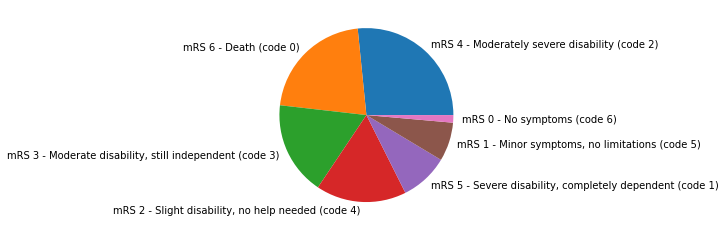

In [6]:
plt.pie(x=y_pre_distribution.values, labels=y_pre_distribution.index)
plt.show()

In [7]:
y_val_to_replace = {'mRS 0 - No symptoms (code 6)': 0,
                    'mRS 1 - Minor symptoms, no limitations (code 5)': 0,
                    'mRS 2 - Slight disability, no help needed (code 4)': 0,
                    'mRS 3 - Moderate disability, still independent (code 3)': 1,
                    'mRS 4 - Moderately severe disability (code 2)': 1,
                    'mRS 5 - Severe disability, completely dependent (code 1)': 1,
                    'mRS 6 - Death (code 0)': 1}
y_baseline = baseline_y_pre.replace(y_val_to_replace)
y_baseline

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: mrs_d90d_c, Length: 500, dtype: int64

In [8]:
y_distribution = y_baseline.value_counts()
y_distribution

1    373
0    127
Name: mrs_d90d_c, dtype: int64

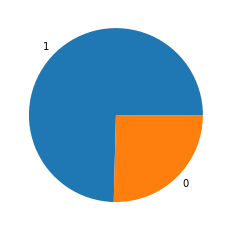

In [9]:
plt.pie(x=y_distribution.values, labels=y_distribution.index)
plt.show()

### Result

Labels are not equal distributed. might need to balance data!

## Preprocess X

In [10]:
baseline_X_pre = clinic[baseline_features]
baseline_X_pre

,r_gender,age,r_ivtrom,r_treall,b_pvstr,b_pvdm,b_pvrr,b_pvaf,b_pvhc,nihsco_abl_c,StudySubjectID
0,Male,38.0,Yes,1 - Intra-arterial treatment,No,No,No,No,No,13.0,AMC001
1,Male,78.0,No,0 - No intra-arterial treatment,No,No,No,Yes,No,16.0,AMC002
2,Male,56.0,No,1 - Intra-arterial treatment,No,No,No,Yes,No,19.0,AMC003
3,Male,62.0,Yes,1 - Intra-arterial treatment,No,No,No,Yes,No,20.0,AMC004
4,Male,47.0,Yes,0 - No intra-arterial treatment,No,No,No,No,No,19.0,AMC005
...,...,...,...,...,...,...,...,...,...,...,...
495,Male,63.0,Yes,1 - Intra-arterial treatment,Yes,No,Yes,No,No,19.0,VUMC001
496,Male,53.0,Yes,0 - No intra-arterial treatment,Yes,No,Yes,No,Yes,14.0,VUMC002
497,Female,52.0,No,0 - No intra-arterial treatment,No,No,No,No,No,19.0,VUMC003
498,Male,67.0,Yes,1 - Intra-arterial treatment,No,No,No,Yes,No,19.0,VUMC004


In [11]:
X_val_to_replace = {'Male' : 0,
                    'Female' : 1,
                    'Yes' : 1,
                    'No' : 0,
                    '1 - Intra-arterial treatment' : 1,
                    '0 - No intra-arterial treatment' : 0
                    }
X_baseline = baseline_X_pre.replace(X_val_to_replace).rename({"r_gender": "female", 'r_treall': 'intra_arterial_treatment'}, axis="columns")
X_baseline

,female,age,r_ivtrom,intra_arterial_treatment,b_pvstr,b_pvdm,b_pvrr,b_pvaf,b_pvhc,nihsco_abl_c,StudySubjectID
0,0,38.0,1,1,0,0,0,0,0,13.0,AMC001
1,0,78.0,0,0,0,0,0,1,0,16.0,AMC002
2,0,56.0,0,1,0,0,0,1,0,19.0,AMC003
3,0,62.0,1,1,0,0,0,1,0,20.0,AMC004
4,0,47.0,1,0,0,0,0,0,0,19.0,AMC005
...,...,...,...,...,...,...,...,...,...,...,...
495,0,63.0,1,1,1,0,1,0,0,19.0,VUMC001
496,0,53.0,1,0,1,0,1,0,1,14.0,VUMC002
497,1,52.0,0,0,0,0,0,0,0,19.0,VUMC003
498,0,67.0,1,1,0,0,0,1,0,19.0,VUMC004


In [12]:
baseline_NIHSS_mean = X_baseline["nihsco_abl_c"].mean()
baseline_age_mean = X_baseline["age"].mean()
baseline_NIHSS_mean

17.598

In [ ]:
baseline_NIHSS_std = X_baseline["nihsco_abl_c"].std()
baseline_age_std = X_baseline["age"].std()
baseline_NIHSS_std

In [ ]:
X_baseline["nihsco_abl_c"] = (X_baseline["nihsco_abl_c"] - baseline_NIHSS_mean) / baseline_NIHSS_std
X_baseline["age"] = (X_baseline["age"] - baseline_age_mean) / baseline_age_std
X_baseline

In [ ]:
baseline_age_std, baseline_age_mean

In [ ]:
X_baseline["nihsco_abl_c"].mean()

In [ ]:
baseline_dataset = pd.concat((X_baseline, y_baseline), axis="columns")
baseline_dataset

In [ ]:
# set clinical center
baseline_dataset["StudySubjectID"] = baseline_dataset.StudySubjectID.apply(lambda s: s[:3])
baseline_dataset

In [ ]:
BIGGEST_CENTERS = ["ANT",
     "AMC",
     "LUM",
     "AZM",
     "RIJ",
     "MCH"]

In [13]:
baseline_dataset["StudySubjectID"].value_counts().index.values.tolist()

NameError: name 'baseline_dataset' is not defined

In [ ]:
def keep_only_centers(df: pd.DataFrame, centers: list[str]) -> pd.DataFrame:
    return df[df["StudySubjectID"].isin(centers)]

In [ ]:
TRAIN_RATIO = 0.75
VAL_RATIO = 0.0
TEST_RATIO = 0.25

# TRAIN_RATIO = 0.65
# VAL_RATIO = 0.15
# TEST_RATIO = 0.20

def split_df_centers(df: pd.DataFrame):

    all_train_sets_org = []
    all_val_sets_org = []
    all_test_sets_org = []

    all_train_sets_norm = []
    all_val_sets_norm = []
    all_test_sets_norm = []

    for center in df["StudySubjectID"].value_counts().index.values.tolist():

        df_center = df[df["StudySubjectID"] == center]

        X_center = df_center.iloc[:,:-1]
        y_center = df_center.iloc[:,-1]

        X_train_center, X_test_temp_center, y_train_center, y_test_temp_center = train_test_split(X_center, y_center, test_size=1-TRAIN_RATIO)

        X_val_center, X_test_center, y_val_center, y_test_center = train_test_split(X_test_temp_center, y_test_temp_center, test_size=TEST_RATIO/(TEST_RATIO + VAL_RATIO))

        #save DFs before normalisation
        train_concat_org = pd.concat((X_train_center, y_train_center), axis="columns")
        val_concat_org = pd.concat((X_val_center, y_val_center), axis="columns")
        test_concat_org = pd.concat((X_test_center, y_test_center), axis="columns")

        train_concat_org.to_csv(f"./datasets/train_org_{center}.csv", index=False)
        val_concat_org.to_csv(f"./datasets/val_org_{center}.csv", index=False)
        test_concat_org.to_csv(f"./datasets/test_org_{center}.csv", index=False)

        all_train_sets_org.append(train_concat_org)
        all_val_sets_org.append(val_concat_org)
        all_test_sets_org.append(test_concat_org)



        # calculate normalisation
        NIHSS_mean_center = X_train_center["nihsco_abl_c"].mean()
        age_mean_center = X_train_center["age"].mean()

        NIHSS_std_center = X_train_center["nihsco_abl_c"].std()
        age_std_center = X_train_center["age"].std()

        X_train_center["nihsco_abl_c"] = (X_train_center["nihsco_abl_c"] - NIHSS_mean_center) / NIHSS_std_center
        X_train_center["age"] = (X_train_center["age"] - age_mean_center) / age_std_center

        X_val_center["nihsco_abl_c"] = (X_val_center["nihsco_abl_c"] - NIHSS_mean_center) / NIHSS_std_center
        X_val_center["age"] = (X_val_center["age"] - age_mean_center) / age_std_center

        X_test_center["nihsco_abl_c"] = (X_test_center["nihsco_abl_c"] - NIHSS_mean_center) / NIHSS_std_center
        X_test_center["age"] = (X_test_center["age"] - age_mean_center) / age_std_center

        #save DFs before normalisation
        train_concat_norm = pd.concat((X_train_center, y_train_center), axis="columns")
        val_concat_norm = pd.concat((X_val_center, y_val_center), axis="columns")
        test_concat_norm = pd.concat((X_test_center, y_test_center), axis="columns")

        train_concat_norm.to_csv(f"./datasets/train_norm_{center}.csv", index=False)
        val_concat_norm.to_csv(f"./datasets/val_norm_{center}.csv", index=False)
        test_concat_norm.to_csv(f"./datasets/test_norm_{center}.csv", index=False)

        all_train_sets_norm.append(train_concat_norm)
        all_val_sets_norm.append(val_concat_norm)
        all_test_sets_norm.append(test_concat_norm)



    pd.concat(all_train_sets_org).to_csv(f"./datasets/train_org_full.csv", index=False)
    pd.concat(all_train_sets_norm).to_csv(f"./datasets/train_norm_full.csv", index=False)

    pd.concat(all_val_sets_org).to_csv(f"./datasets/val_org_full.csv", index=False)
    pd.concat(all_val_sets_norm).to_csv(f"./datasets/val_norm_full.csv", index=False)

    pd.concat(all_test_sets_org).to_csv(f"./datasets/test_org_full.csv", index=False)
    pd.concat(all_test_sets_norm).to_csv(f"./datasets/test_norm_full.csv", index=False)




In [ ]:
reduced = keep_only_centers(baseline_dataset, BIGGEST_CENTERS)
reduced

In [ ]:
split_df_centers(reduced)

In [ ]:
baseline_dataset.to_csv("./clinic_federated_preprocessed_without_normalisation.csv", index=False)

In [ ]:
train_ratio = 0.65
validation_ratio = 0.15
test_ratio = 0.20

x_full = baseline_dataset.iloc[:,:-1]
y_full = baseline_dataset.iloc[:,-1]

# train is now 65% of the entire data set
X_train, x_test_temp, y_train, y_test_temp = train_test_split(x_full, y_full, test_size=1 - train_ratio)

# test is now 20% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(x_test_temp, y_test_temp, test_size=test_ratio/(test_ratio + validation_ratio))

X_train.shape, X_val.shape, X_test.shape

In [ ]:
X_train.StudySubjectID.value_counts()

In [ ]:
pd.concat((X_train, y_train), axis="columns").to_csv("./clinic_fed_train.csv")

In [ ]:
pd.concat((X_val, y_val), axis="columns").to_csv("./clinic_fed_val.csv")
pd.concat((X_test, y_test), axis="columns").to_csv("./clinic_fed_test.csv")

In [ ]:
baseline_dataset.drop("StudySubjectID", axis="columns").to_csv("./baseline_dataset_medium_in_one.csv", index=False)

In [ ]:
baseline_dataset.to_pickle("./baseline_dataset.pkl", protocol=4)

In [ ]:
pd.concat((X_baseline, y_baseline), axis="columns").drop("StudySubjectID", axis="columns").to_csv("./baseline_dataset_three_cat.csv", index=False) #without normalisation

In [ ]:
# plot y per center
# -> bias?


In [ ]:
plt.pie(x=y_pre_distribution.values, labels=y_pre_distribution.index)
plt.show()

In [ ]:
baseline_dataset.iloc[:, :-2]

In [ ]:
baseline_dataset

In [ ]:
age = baseline_dataset.age
age

In [ ]:
plt.scatter(age, baseline_dataset.mrs_d90d_c)
plt.show()

In [ ]:
print(baseline_dataset[["age", "mrs_d90d_c"]].corr().iloc[0,-1])

In [14]:
baseline_dataset[["age", "mrs_d90d_c"]].corr()

NameError: name 'baseline_dataset' is not defined

In [15]:
import numpy as np

In [16]:
baseline_X_pre

,r_gender,age,r_ivtrom,r_treall,b_pvstr,b_pvdm,b_pvrr,b_pvaf,b_pvhc,nihsco_abl_c,StudySubjectID
0,Male,38.0,Yes,1 - Intra-arterial treatment,No,No,No,No,No,13.0,AMC001
1,Male,78.0,No,0 - No intra-arterial treatment,No,No,No,Yes,No,16.0,AMC002
2,Male,56.0,No,1 - Intra-arterial treatment,No,No,No,Yes,No,19.0,AMC003
3,Male,62.0,Yes,1 - Intra-arterial treatment,No,No,No,Yes,No,20.0,AMC004
4,Male,47.0,Yes,0 - No intra-arterial treatment,No,No,No,No,No,19.0,AMC005
...,...,...,...,...,...,...,...,...,...,...,...
495,Male,63.0,Yes,1 - Intra-arterial treatment,Yes,No,Yes,No,No,19.0,VUMC001
496,Male,53.0,Yes,0 - No intra-arterial treatment,Yes,No,Yes,No,Yes,14.0,VUMC002
497,Female,52.0,No,0 - No intra-arterial treatment,No,No,No,No,No,19.0,VUMC003
498,Male,67.0,Yes,1 - Intra-arterial treatment,No,No,No,Yes,No,19.0,VUMC004


In [17]:
np.array_split(baseline_X_pre, 3)

[    r_gender   age r_ivtrom                         r_treall b_pvstr b_pvdm  \
 0       Male  38.0      Yes     1 - Intra-arterial treatment      No     No   
 1       Male  78.0       No  0 - No intra-arterial treatment      No     No   
 2       Male  56.0       No     1 - Intra-arterial treatment      No     No   
 3       Male  62.0      Yes     1 - Intra-arterial treatment      No     No   
 4       Male  47.0      Yes  0 - No intra-arterial treatment      No     No   
 ..       ...   ...      ...                              ...     ...    ...   
 162     Male  54.0      Yes  0 - No intra-arterial treatment      No     No   
 163   Female  53.0      Yes     1 - Intra-arterial treatment      No     No   
 164     Male  72.0      Yes  0 - No intra-arterial treatment     Yes     No   
 165   Female  68.0      Yes     1 - Intra-arterial treatment     Yes     No   
 166   Female  76.0      Yes     1 - Intra-arterial treatment     Yes     No   
 
     b_pvrr b_pvaf b_pvhc  nihsco_abl_

In [18]:
baseline_X_pre.iloc[3:, :]

,r_gender,age,r_ivtrom,r_treall,b_pvstr,b_pvdm,b_pvrr,b_pvaf,b_pvhc,nihsco_abl_c,StudySubjectID
3,Male,62.0,Yes,1 - Intra-arterial treatment,No,No,No,Yes,No,20.0,AMC004
4,Male,47.0,Yes,0 - No intra-arterial treatment,No,No,No,No,No,19.0,AMC005
5,Female,66.0,Yes,0 - No intra-arterial treatment,No,No,Yes,Yes,Yes,24.0,AMC006
6,Female,42.0,Yes,1 - Intra-arterial treatment,No,No,No,No,No,28.0,AMC007
7,Male,77.0,Yes,0 - No intra-arterial treatment,No,No,Yes,No,No,10.0,AMC008
...,...,...,...,...,...,...,...,...,...,...,...
495,Male,63.0,Yes,1 - Intra-arterial treatment,Yes,No,Yes,No,No,19.0,VUMC001
496,Male,53.0,Yes,0 - No intra-arterial treatment,Yes,No,Yes,No,Yes,14.0,VUMC002
497,Female,52.0,No,0 - No intra-arterial treatment,No,No,No,No,No,19.0,VUMC003
498,Male,67.0,Yes,1 - Intra-arterial treatment,No,No,No,Yes,No,19.0,VUMC004


In [19]:
baseline_X_pre.iloc[:3, :]

,r_gender,age,r_ivtrom,r_treall,b_pvstr,b_pvdm,b_pvrr,b_pvaf,b_pvhc,nihsco_abl_c,StudySubjectID
0,Male,38.0,Yes,1 - Intra-arterial treatment,No,No,No,No,No,13.0,AMC001
1,Male,78.0,No,0 - No intra-arterial treatment,No,No,No,Yes,No,16.0,AMC002
2,Male,56.0,No,1 - Intra-arterial treatment,No,No,No,Yes,No,19.0,AMC003


In [24]:
baseline_X_pre["StudySubjectID"] = baseline_X_pre.StudySubjectID.apply(lambda s: s[:3])

/var/folders/0b/2t921x515nx6m_3_8czjwjs80000gn/T/ipykernel_18396/25900607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_X_pre["StudySubjectID"] = baseline_X_pre.StudySubjectID.apply(lambda s: s[:3])


In [63]:
((np.array(baseline_X_pre["StudySubjectID"].value_counts().iloc[:6].to_list()) / 370) * 273).round(0).sum()

273.0

In [32]:
len(baseline_X_pre)

500

In [44]:
x = 60 / 100 * 273

In [46]:
x

163.79999999999998

In [45]:
round(x)

164

In [48]:
round(25 / 100 * 273)

68

In [47]:
round(15 / 100 * 273)

41

In [49]:
164 + 68 + 41

273

In [ ]:
44.0
38.0
33.0
32.0
29.0
27.0